# MARATONA BEHIND THE CODE 2020

## DESAFIO 7 - TNT

### Desafio desenvolvido por Cinthya Oestreich Silva

<hr>

## Installing Libs

In [1]:
!pip install cloudant

In [2]:
!pip install scikit-learn --upgrade

Requirement already up-to-date: scikit-learn in c:\users\cinth\anaconda3\envs\ml\lib\site-packages (0.23.2)


In [3]:
!pip install xgboost --upgrade

Requirement already up-to-date: xgboost in c:\users\cinth\anaconda3\envs\ml\lib\site-packages (1.2.0)


In [4]:
!pip install imblearn --upgrade

Requirement already up-to-date: imblearn in c:\users\cinth\anaconda3\envs\ml\lib\site-packages (0.0)


In [5]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network  import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

<hr>

In [6]:
#Conexão com Cloudant

In [15]:
from cloudant import Cloudant
# PEGAR AS INFROMAÇÕES ABAIXO NA ABA CREDENTIALS DO SERVIÇO DE CLOUDANT NA IBM CLOUD
u = '8f71d80f-3f15-4cef-8336-d45f5389ed24-bluemix'
p = '61ea008118f4ffbf48692be580fe2c54f2ebbdffacd3976a4ab861aacddadff6'
a = '8f71d80f-3f15-4cef-8336-d45f5389ed24-bluemix' # SIM, O ENDPOINT CIRADO PARA O SEU CLOUD É O MESMO QUE O USUÁRIO :-)
client = Cloudant(u, p, account=a, connect=True, auto_renew=True)

In [16]:
#Informar o nome do database que vamos utilizar

In [17]:
db = client['iot-cinthya'] # NOME DO DB CRIADO NO CLOUDANT

In [24]:
response = db.all_docs(limit=41000, include_docs= True)

# put document bodies into an array
docs = []
cont=0
for r in response['rows']:
    docs.append(r['doc']) # CASO TENHA USADO O NODE-RED E GRAVADO TODO O MSG USE: docs.append(r['doc']['payload'])
    cont=cont + 1;
type(docs)
print(cont)

40565


In [25]:
# create a Pandas dataframe containing the data
import pandas as pd
df = pd.DataFrame(data=docs)
df.head()

,_id,_rev,Tempo,Estação,LAT,LONG,Movimentação,Original_473,Original_269,Zero,Maçã-Verde,Tangerina,Citrus,Açaí-Guaraná,Pêssego,TARGET,row
0,000ac62b7850525df9febd4a6700abf7,1-0cdc83e5b5afd13faf298af029d4e472,2019-3-5,Tamanduateí,-23.59290,-46.5897,51490,5,32,51,7,6,8,41,43,REABASTECER,3305
1,000ac62b7850525df9febd4a670522b3,1-e12dfa30e922dacf448dd30794c45b23,2019-5-8,Tamanduateí,-23.59290,-46.5897,49456,57,19,50,43,8,27,2,14,REABASTECER,3368
2,000ac62b7850525df9febd4a6708cb78,1-af4708895781723f9742a350f1a50cd9,2018-3-8,Trianon-Masp,-23.5634,-46.6544,42826,48,38,56,17,40,4,26,28,REABASTECER,1508
3,000ac62b7850525df9febd4a670f2050,1-a72d3ef88ffb5c2f4af0ae7b334d8fbd,2019-3-22,Sé,-23.55,-46.6333,191530,6,40,65,36,31,40,14,26,REABASTECER,4042
4,000ac62b7850525df9febd4a670f3db6,1-f01e4342f7ba8544202c98fd9e348332,2019-3-25,Sé,-23.55,-46.6333,195050,60,17,50,24,16,29,3,13,REABASTECER,4045


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40565 entries, 0 to 40564
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   _id           40565 non-null  object
 1   _rev          40565 non-null  object
 2   Tempo         40565 non-null  object
 3   Estação       40565 non-null  object
 4   LAT           40565 non-null  object
 5   LONG          40565 non-null  object
 6   Movimentação  40565 non-null  object
 7   Original_473  40565 non-null  object
 8   Original_269  40565 non-null  object
 9   Zero          40565 non-null  object
 10  Maçã-Verde    40565 non-null  object
 11  Tangerina     40565 non-null  object
 12  Citrus        40565 non-null  object
 13  Açaí-Guaraná  40565 non-null  object
 14  Pêssego       40565 non-null  object
 15  TARGET        40565 non-null  object
 16  row           40565 non-null  int64 
dtypes: int64(1), object(16)
memory usage: 5.3+ MB


In [ ]:
#teste exemplo GAMA
#import pixiedust
#display(df)

In [27]:
#Salvar dataframe como CSV 
df.to_csv('base_40mil.csv')

## Download dos conjuntos de dados em formato .csv

In [34]:
import pandas as pd

In [35]:
# Insira aqui o pandasDataFrame.
df_data_1=pd.read_csv("base_40mil.csv")

In [36]:
df_training_dataset = df_data_1
df_training_dataset.tail()

,Unnamed: 0,_id,_rev,Tempo,Estação,LAT,LONG,Movimentação,Original_473,Original_269,Zero,Maçã-Verde,Tangerina,Citrus,Açaí-Guaraná,Pêssego,TARGET,row
40560,40560,ffabfca4d84d1f9b7239d6ae8ee35b31,1-970893568afaa6bfcda765af27c20a25,2018-8-22,Sé,-23.5500,-46.6333,194364,86,8,23,20,39,14,16,31,REABASTECER,3832
40561,40561,ffabfca4d84d1f9b7239d6ae8eeb067a,1-82d937231c7e23eaf791320d97d7adef,2019-6-14,Barra Funda,-23.5542,-46.6707,150357,4,65,52,29,36,29,35,19,NORMAL,5564
40562,40562,ffabfca4d84d1f9b7239d6ae8ef2cc9f,1-7ece9600a7418c6a4c127f623ef311f3,2019-7-4,Higienópolis-Mackenzie,-23.5488,-46.6519,92852,77,49,65,12,43,35,43,43,NORMAL,7744
40563,40563,ffabfca4d84d1f9b7239d6ae8ef67775,1-a56e2da37b4f6049a82915c9fed64c50,2019-12-3,Barra Funda,-23.5542,-46.6707,150110,65,47,65,10,14,28,4,22,REABASTECER,5733
40564,40564,ffabfca4d84d1f9b7239d6ae8ef87e4b,1-f4ff58adce877e97839eab1f7c579529,2019-6-19,Sé,-23.5500,-46.6333,192726,74,31,25,29,12,43,8,4,REABASTECER,4129


Sobre o arquivo "training_dataset.csv", temos algumas informações gerais sobre os pontos de vendas da TNT:

**Tempo**

**Estação**

**LAT**

**LONG**

**Movimentação**

**Original_473**

**Original_269**

**Zero**

**Maçã-Verde**

**Tangerina**

**Citrus**

**Açaí-Guaraná**

**Pêssego**

**TARGET**

In [37]:
df_training_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40565 entries, 0 to 40564
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    40565 non-null  int64  
 1   _id           40565 non-null  object 
 2   _rev          40565 non-null  object 
 3   Tempo         40565 non-null  object 
 4   Estação       40565 non-null  object 
 5   LAT           40565 non-null  float64
 6   LONG          40565 non-null  float64
 7   Movimentação  40565 non-null  int64  
 8   Original_473  40565 non-null  int64  
 9   Original_269  40565 non-null  int64  
 10  Zero          40565 non-null  int64  
 11  Maçã-Verde    40565 non-null  int64  
 12  Tangerina     40565 non-null  int64  
 13  Citrus        40565 non-null  int64  
 14  Açaí-Guaraná  40565 non-null  int64  
 15  Pêssego       40565 non-null  int64  
 16  TARGET        40565 non-null  object 
 17  row           40565 non-null  int64  
dtypes: float64(2), int64(11), 

In [38]:
df_training_dataset.nunique()

Unnamed: 0      40565
_id             40565
_rev            15581
Tempo             720
Estação            25
LAT                25
LONG               25
Movimentação    13755
Original_473       81
Original_269       65
Zero               63
Maçã-Verde         43
Tangerina          42
Citrus             43
Açaí-Guaraná       42
Pêssego            42
TARGET              2
row             15581
dtype: int64

## Pre-processando o dataset antes do treinamento

### Processando valores NaN com o SimpleImputer do sklearn

Para os valores NaN, usaremos a substituição pela constante 0 como **exemplo**.

Você pode escolher a estratégia que achar melhor para tratar os valores nulos :)

Docs: https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html?highlight=simpleimputer#sklearn.impute.SimpleImputer

In [39]:
from sklearn.impute import SimpleImputer
import numpy as np


impute_zeros = SimpleImputer(
    missing_values=np.nan,
    strategy='constant',
    fill_value=0,
    verbose=0,
    copy=True
)

In [40]:
# Exibindo os dados ausentes do conjunto de dados antes da primeira transformação (df)
print("Valores nulos no df_training_dataset antes da transformação SimpleImputer: \n\n{}\n".format(df_training_dataset.isnull().sum(axis = 0)))

# Aplicando a transformação ``SimpleImputer`` no conjunto de dados base
impute_zeros.fit(X=df_training_dataset)

# Reconstruindo um Pandas DataFrame com os resultados
df_training_dataset_imputed = pd.DataFrame.from_records(
    data=impute_zeros.transform(
        X=df_training_dataset
    ),
    columns=df_training_dataset.columns
)

# Exibindo os dados ausentes do conjunto de dados após a primeira transformação (df)
print("Valores nulos no df_training_dataset após a transformação SimpleImputer: \n\n{}\n".format(df_training_dataset_imputed.isnull().sum(axis = 0)))

Valores nulos no df_training_dataset antes da transformação SimpleImputer: 

Unnamed: 0      0
_id             0
_rev            0
Tempo           0
Estação         0
LAT             0
LONG            0
Movimentação    0
Original_473    0
Original_269    0
Zero            0
Maçã-Verde      0
Tangerina       0
Citrus          0
Açaí-Guaraná    0
Pêssego         0
TARGET          0
row             0
dtype: int64

Valores nulos no df_training_dataset após a transformação SimpleImputer: 

Unnamed: 0      0
_id             0
_rev            0
Tempo           0
Estação         0
LAT             0
LONG            0
Movimentação    0
Original_473    0
Original_269    0
Zero            0
Maçã-Verde      0
Tangerina       0
Citrus          0
Açaí-Guaraná    0
Pêssego         0
TARGET          0
row             0
dtype: int64



### Eliminando colunas indesejadas

Vamos **demonstrar** abaixo como usar o método **DataFrame.drop()**.

Docs: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html

In [41]:
df_training_dataset_imputed.tail()

,Unnamed: 0,_id,_rev,Tempo,Estação,LAT,LONG,Movimentação,Original_473,Original_269,Zero,Maçã-Verde,Tangerina,Citrus,Açaí-Guaraná,Pêssego,TARGET,row
40560,40560,ffabfca4d84d1f9b7239d6ae8ee35b31,1-970893568afaa6bfcda765af27c20a25,2018-8-22,Sé,-23.5500,-46.6333,194364,86,8,23,20,39,14,16,31,REABASTECER,3832
40561,40561,ffabfca4d84d1f9b7239d6ae8eeb067a,1-82d937231c7e23eaf791320d97d7adef,2019-6-14,Barra Funda,-23.5542,-46.6707,150357,4,65,52,29,36,29,35,19,NORMAL,5564
40562,40562,ffabfca4d84d1f9b7239d6ae8ef2cc9f,1-7ece9600a7418c6a4c127f623ef311f3,2019-7-4,Higienópolis-Mackenzie,-23.5488,-46.6519,92852,77,49,65,12,43,35,43,43,NORMAL,7744
40563,40563,ffabfca4d84d1f9b7239d6ae8ef67775,1-a56e2da37b4f6049a82915c9fed64c50,2019-12-3,Barra Funda,-23.5542,-46.6707,150110,65,47,65,10,14,28,4,22,REABASTECER,5733
40564,40564,ffabfca4d84d1f9b7239d6ae8ef87e4b,1-f4ff58adce877e97839eab1f7c579529,2019-6-19,Sé,-23.5500,-46.6333,192726,74,31,25,29,12,43,8,4,REABASTECER,4129


In [42]:
#Tirando duplicados 
df_training_duplicate = df_training_dataset_imputed.drop_duplicates(subset=['row'])

In [43]:
df_training_dataset_rmcolumns = df_training_duplicate .drop(columns=['Unnamed: 0','_id','_rev','Tempo','Estação', 'Movimentação','LAT', 'LONG','row'], inplace=False)

In [44]:
df_training_dataset_rmcolumns.tail()

,Original_473,Original_269,Zero,Maçã-Verde,Tangerina,Citrus,Açaí-Guaraná,Pêssego,TARGET
40541,86,50,51,43,3,23,25,26,REABASTECER
40545,42,17,17,35,25,14,3,7,REABASTECER
40554,13,40,34,21,19,4,12,8,NORMAL
40555,13,17,48,9,12,17,24,27,NORMAL
40559,78,36,65,31,5,8,14,18,REABASTECER


In [45]:
df_training_final = df_training_dataset_rmcolumns
df_training_final.tail()

,Original_473,Original_269,Zero,Maçã-Verde,Tangerina,Citrus,Açaí-Guaraná,Pêssego,TARGET
40541,86,50,51,43,3,23,25,26,REABASTECER
40545,42,17,17,35,25,14,3,7,REABASTECER
40554,13,40,34,21,19,4,12,8,NORMAL
40555,13,17,48,9,12,17,24,27,NORMAL
40559,78,36,65,31,5,8,14,18,REABASTECER


In [46]:
df_training_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15581 entries, 0 to 40559
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Original_473  15581 non-null  int64 
 1   Original_269  15581 non-null  int64 
 2   Zero          15581 non-null  int64 
 3   Maçã-Verde    15581 non-null  int64 
 4   Tangerina     15581 non-null  int64 
 5   Citrus        15581 non-null  int64 
 6   Açaí-Guaraná  15581 non-null  int64 
 7   Pêssego       15581 non-null  int64 
 8   TARGET        15581 non-null  object
dtypes: int64(8), object(1)
memory usage: 1.2+ MB


## Realizei algumas visualizações para entender melhor a base de dados

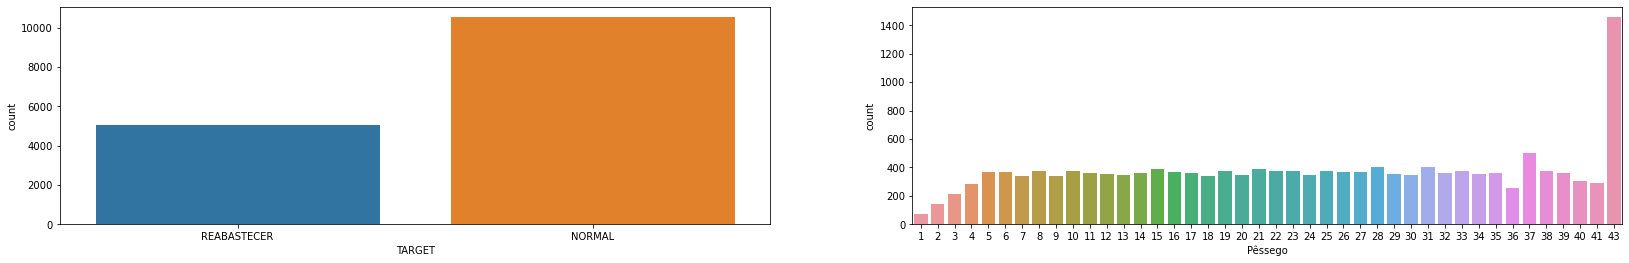

In [47]:
import matplotlib.pyplot as plt
import itertools
import seaborn as sns

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(28, 4))

sns.countplot(ax=axes[0], x='TARGET', data=df_training_final)
sns.countplot(ax=axes[1], x='Pêssego', data=df_training_final)

<hr>

## Treinando vários classificadores

### Selecionando FEATURES e definindo a variável TARGET

In [48]:
df_training_final.columns

Index(['Original_473', 'Original_269', 'Zero', 'Maçã-Verde', 'Tangerina',
       'Citrus', 'Açaí-Guaraná', 'Pêssego', 'TARGET'],
      dtype='object')

In [49]:
features = df_training_final[
    [
        'Original_473', 'Original_269', 'Zero', 'Maçã-Verde', 'Tangerina',
       'Citrus', 'Açaí-Guaraná', 'Pêssego'
    ]
]
target = df_training_final['TARGET']  ## NÃO TROQUE O NOME DA VARIÁVEL TARGET.

### Dividindo nosso conjunto de dados em conjuntos de treinamento e teste
### Como possuimos um desabalancemanto da base utilizeo o smote. Lembrando que o ideal seria utilizar o smote apenas no X e Y de treino. 
### Neste caso decidi treinar 90% da base para conseguir um reinamento mais consistente, assim a acurácia , f1 score etc são o caminho mas não o final. Apenas soube se funcionou depois do resultado da maratona

In [50]:
#Smote
import imblearn
from imblearn.over_sampling import SMOTE

oversample = SMOTE()
X, y = oversample.fit_resample(features, target)

In [51]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=133)

### Treinando uma árvore de decisão

In [56]:
# Método para criar um árvore de decisão
from sklearn.tree import DecisionTreeClassifier
import urllib
import random 
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn import svm, datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network  import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
import lightgbm as lgb
from lightgbm import LGBMModel,LGBMClassifier

from sklearn.metrics import confusion_matrix


#dtc = DecisionTreeClassifier(max_depth=15).fit(X_train, y_train)

rng = np.random.RandomState(123)

lr = LogisticRegression(C=1e5,solver='lbfgs',max_iter = 500)
#dt =  DecisionTreeClassifier(criterion='entropy')
dt=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=32,
     max_features=None, max_leaf_nodes=None,
     min_impurity_split=1e-07, min_samples_leaf=1,
     min_samples_split=2, min_weight_fraction_leaf=0.0,
     presort=False, random_state=None, splitter='best')

knn = KNeighborsClassifier(algorithm='auto', leaf_size=10, metric='minkowski',
 metric_params=None, n_jobs=1, n_neighbors=6, p=2,
 weights='uniform')
mlp = MLPClassifier(solver='sgd', early_stopping=True, hidden_layer_sizes=(1000), activation='logistic', batch_size=100, max_iter=10000, learning_rate_init=0.1, momentum=0.2, tol=1e-10, random_state=rng)
nb = GaussianNB(var_smoothing=1e-09)

# Define ensembles
#rf = RandomForestClassifier(criterion ='entropy', min_samples_split = 6, n_estimators=100, random_state=0)
#rf = RandomForestClassifier(max_features = 'auto', criterion ='entropy', min_samples_split = 6, n_estimators=100, random_state=50, oob_score = True)
rf = RandomForestClassifier(max_features = 'auto',max_depth= 8 ,criterion ='entropy', n_estimators=200, random_state=50, oob_score = True)


# parameters for SVM

#svc = svm.SVC(kernel='linear')


xgb = XGBClassifier(  learning_rate=0.1,  
                      colsample_bytree = 0.4,
                      subsample = 0.8,
                      objective='binary:logistic', 
                      n_estimators=1000, 
                      reg_alpha = 0.3,
                      max_depth=6, 
                      gamma=10,
                      min_child_weight=1)
# antes max_depht = 4

'''lgb=LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=8606, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)'''

cb = VotingClassifier(estimators=[('RandonFlorest', rf),('dt', dt),('xgb', xgb)], voting='soft')


titles = ['LogisticRegresson', 'DecisionTree', 'KNN', 'NaiveBayes', 'MLP', 'RF', 'RF+XGB' , 'xgb']
methods = [lr, dt, knn, nb, mlp, rf, cb ,xgb]


In [57]:
scores = []
for method, name in zip(methods, titles):
    method.fit(X_train, y_train)
    scores.append(method.score(X_test, y_test))
    print("Classification accuracy {} = {}"
          .format(name, method.score(X_test, y_test)))

Classification accuracy LogisticRegresson = 0.6324786324786325
Classification accuracy DecisionTree = 0.7967711301044634


C:\Users\cinth\anaconda3\envs\ML\lib\site-packages\sklearn\tree\_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)
C:\Users\cinth\anaconda3\envs\ML\lib\site-packages\sklearn\tree\_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)


Classification accuracy KNN = 0.7521367521367521
Classification accuracy NaiveBayes = 0.6595441595441596
Classification accuracy MLP = 0.7787274453941121
Classification accuracy RF = 0.8376068376068376


C:\Users\cinth\anaconda3\envs\ML\lib\site-packages\sklearn\tree\_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)
C:\Users\cinth\anaconda3\envs\ML\lib\site-packages\sklearn\tree\_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)


Classification accuracy RF+XGB = 0.8247863247863247
Classification accuracy xgb = 0.8300094966761633


LogisticRegresson
            NORMAL  REABASTECER
F1-Score  0.632827     0.632129
Precisão  0.640730     0.624413
Recall    0.625117     0.640038


DecisionTree
            NORMAL  REABASTECER
F1-Score  0.795802     0.797732
Precisão  0.810496     0.783658
Recall    0.781631     0.812320


KNN
            NORMAL  REABASTECER
F1-Score  0.758333     0.745614
Precisão  0.749314     0.755183
Recall    0.767573     0.736285


NaiveBayes
            NORMAL  REABASTECER
F1-Score  0.662588     0.656445
Precisão  0.665406     0.653626
Recall    0.659794     0.659288


MLP
           NORMAL  REABASTECER
F1-Score  0.76078     0.794170
Precisão  0.84109     0.733878
Recall    0.69447     0.865255


RF
            NORMAL  REABASTECER
F1-Score  0.812910     0.856544
Precisão  0.976347     0.759108
Recall    0.696345     0.982676


RF+XGB
            NORMAL  REABASTECER
F1-Score  0.817778     0.831276
Precisão  0.864301     0.791812
Recall    0.776007     0.874880


xgb
            NORMAL  REABASTECE

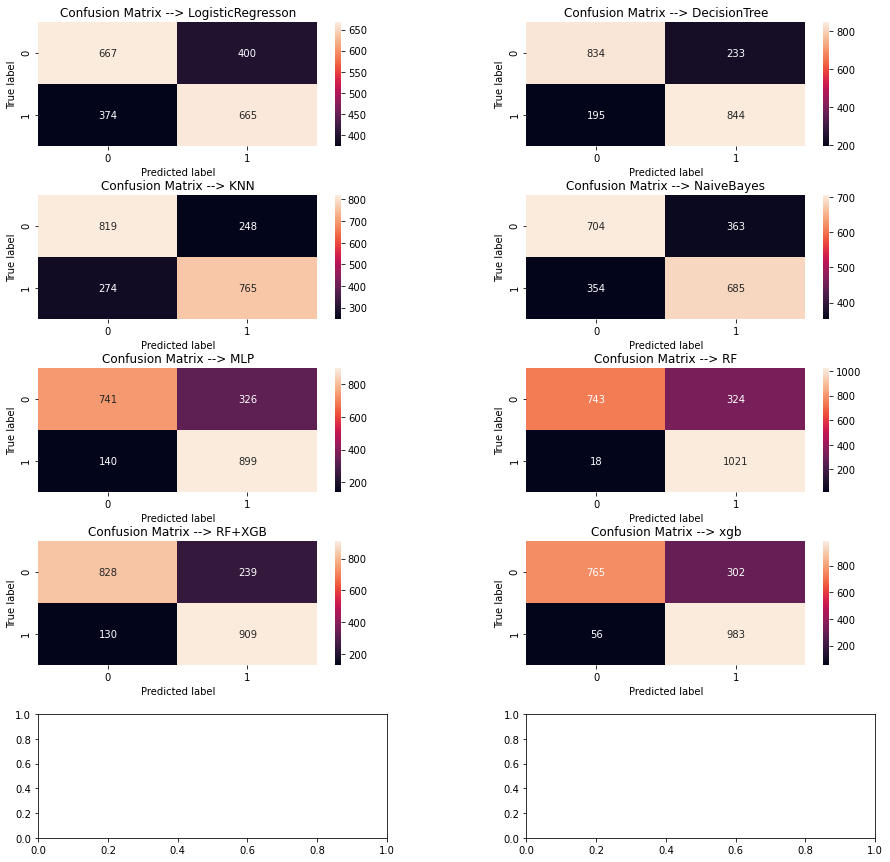

<Figure size 432x288 with 0 Axes>

In [58]:
import seaborn as sns
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

fig3, sub1 = plt.subplots(5, 2, figsize=(15, 15))
plt.subplots_adjust(wspace=0.4, hspace=0.4)
class_names=['NORMAL','REABASTECER', ] 
for clf, ax, title in zip(methods, sub1.flatten(), titles):
    y_predicted = clf.predict(X_test)
    cm = confusion_matrix(y_test, y_predicted)
    #plot_confusion_matrix(ax, cm, title)
    df_cm = pd.DataFrame(cm, index = [i for i in "01"],
                  columns = [i for i in "01"])
    sns.heatmap(df_cm, annot=True, ax=ax, fmt = 'd')
    ax.set_title('Confusion Matrix --> ' + title)
    ax.set_ylabel('True label')
    ax.set_xlabel('Predicted label')
    fScore = f1_score(y_test, y_predicted ,average=None)
    precision = precision_score(y_test, y_predicted ,average=None)
    recall = recall_score(y_test, y_predicted ,average=None)
    
    numpy_data = np.array([fScore,precision,recall]) 
    df = pd.DataFrame(data=numpy_data, index=["F1-Score", "Precisão","Recall"], columns = class_names)
    print(title )
    print(df)
    print('\n')

plt.show()
plt.tight_layout()

## Grid View Random Florest
### Depois que eu verifiquei o rando florest apliquei o metodo de Grid View para escolher os melhores parametros que foram usado acima.

In [66]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier


rfc=RandomForestClassifier(random_state=42)

param_grid = { 
    'n_estimators': [100,200,500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, y_train)

CV_rfc.best_params_

{'criterion': 'entropy',
 'max_depth': 8,
 'max_features': 'auto',
 'n_estimators': 200}

In [22]:
pip install pycaret

ERROR: After October 2020 you may experience errors when installing or updating packages. This is because pip will change the way that it resolves dependency conflicts.

We recommend you use --use-feature=2020-resolver to test your packages with the new resolver before it becomes the default.

pandas-profiling 2.9.0 requires pandas!=1.0.0,!=1.0.1,!=1.0.2,!=1.1.0,>=0.25.3, but you'll have pandas 1.1.0 which is incompatible.


  Using cached toml-0.10.1-py2.py3-none-any.whl (19 kB)


  Created wheel for cufflinks: filename=cufflinks-0.17.3-py3-none-any.whl size=68729 sha256=b522f90352f6765706037bb27558d4289ebe65c005fe74ea02be30345287775a
  Stored in directory: c:\users\cinth\appdata\local\pip\cache\wheels\1c\db\ce\70cf35eb5a61b9ea3d34434072a8821dddc4f21eb5127e5415
  Created wheel for pyLDAvis: filename=pyLDAvis-2.1.2-py2.py3-none-any.whl size=97716 sha256=4cf29a96b919cc0bd573840ab9b3ea87a1bb32b0367329e9a5e0e7332515ab00
  Stored in directory: c:\users\cinth\appdata\local\pip\cache\wheels\57\de\11\0a038be70c2c212ce45fa0f4f9da165bb5dd87de1288394dc3
  Created wheel for umap-learn: filename=umap_learn-0.4.6-py3-none-any.whl size=67956 sha256=d5845ee7b367a4cac6dc6b8341fad7e29c448914d7b302932fff243131320a8d
  Stored in directory: c:\users\cinth\appdata\local\pip\cache\wheels\22\ce\3d\75f6600b4d93c851021aceeec51b7b330c0ad4d9692e69be6a
  Created wheel for pyod: filename=pyod-0.8.2-py3-none-any.whl size=110201 sha256=385212f01702ae2f7958611b8130fcc26d58346e6f19fcd598c16e0b36

## Deep Learning
### Nesta parte utilizei uma rede neural para realizar o treinamento e verificar se ela possuia uma melhor performance que os outros modelos

In [59]:
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import LabelEncoder

#Target com binário 
def prepare_targets(y_train, y_test):
    le = LabelEncoder()
    le.fit(y_train)
    y_train_enc = le.transform(y_train)
    y_test_enc = le.transform(y_test)
    return y_train_enc, y_test_enc

y_train_enc, y_test_enc = prepare_targets(y_train, y_test)

In [60]:
print(y_test)
print(y_test_enc)

9596     REABASTECER
5213          NORMAL
17280    REABASTECER
13598    REABASTECER
11161    REABASTECER
            ...     
16376    REABASTECER
4802     REABASTECER
10646         NORMAL
9101     REABASTECER
6857          NORMAL
Name: TARGET, Length: 2106, dtype: object
[1 0 1 ... 0 1 0]


In [34]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.layers import Dropout,Flatten


model = Sequential()
model.add(Dense(16, input_dim=8,kernel_initializer='uniform', activation='relu'))
model.add(Dense(16 ,activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='softmax'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train_enc, epochs=50, batch_size=20)


Epoch 1/50
16846/16846 [==============================] - 3s 159us/step - loss: 0.6687 - accuracy: 0.5840
Epoch 2/50
16846/16846 [==============================] - 2s 133us/step - loss: 0.6393 - accuracy: 0.6368
Epoch 3/50
16846/16846 [==============================] - 2s 145us/step - loss: 0.6197 - accuracy: 0.6726
Epoch 4/50
16846/16846 [==============================] - 2s 137us/step - loss: 0.6095 - accuracy: 0.6847
Epoch 5/50
16846/16846 [==============================] - 2s 129us/step - loss: 0.5996 - accuracy: 0.6966
Epoch 6/50
16846/16846 [==============================] - 2s 138us/step - loss: 0.5866 - accuracy: 0.7041
Epoch 7/50
16846/16846 [==============================] - 2s 137us/step - loss: 0.5755 - accuracy: 0.7170
Epoch 8/50
16846/16846 [==============================] - 2s 136us/step - loss: 0.5590 - accuracy: 0.7318
Epoch 9/50
16846/16846 [==============================] - 2s 138us/step - loss: 0.5475 - accuracy: 0.7348
Epoch 10/50
16846/16846 [=====================

In [35]:
#Previsões depp learning

y_pred = model.predict_classes(X_test)
#print(y_pred)

## Métricas do Deep Learning

In [36]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import plot_confusion_matrix


print(confusion_matrix(y_test_enc, y_pred))

fScore = f1_score(y_test_enc, y_pred ,average=None)
precision = precision_score(y_test_enc, y_pred ,average=None)
recall = recall_score(y_test_enc, y_pred ,average=None)

print("F1 Score:", fScore)
print("Precision:", precision)
print("Recall:", recall)


[[1529  618]
 [ 187 1878]]
F1 Score: [0.79161274 0.82350362]
Precision: [0.89102564 0.75240385]
Recall: [0.7121565 0.9094431]


## Conclusão.
### A rede neural não se saiu melhor que nosso random florest ou o ensemble 

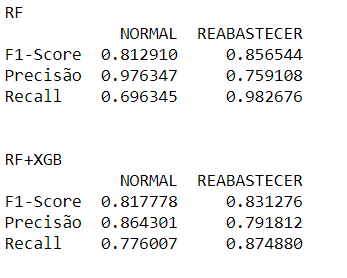



### Para maximar a minha performance eu treinei toda a base de treino sem dividir em treino e teste. E foi com este modelo que eu participei da maratona

In [75]:
#Treinar a base toda
cb.fit(X,y)

VotingClassifier(estimators=[('RandonFlorest',
                              RandomForestClassifier(bootstrap=True,
                                                     ccp_alpha=0.0,
                                                     class_weight=None,
                                                     criterion='entropy',
                                                     max_depth=8,
                                                     max_features='auto',
                                                     max_leaf_nodes=None,
                                                     max_samples=None,
                                                     min_impurity_decrease=0.0,
                                                     min_impurity_split=None,
                                                     min_samples_leaf=1,
                                                     min_samples_split=2,
                                                     min_weight_fraction_leaf=0.

<hr>

## Scoring dos dados necessários para entregar a solução
### Abaixo se encontra o código para entrega do desafio 

Como entrega da sua solução, esperamos os resultados classificados no seguinte dataset chamado "to_be_scored.csv":

### Download da "folha de respostas"

In [76]:
#!wget --no-check-certificate --content-disposition https://gitlab.com/JoaoPedroPP/datasets/-/raw/master/ntn/to_be_scored.csv
df_to_be_scored = pd.read_csv(r'to_be_scored.csv')
df_to_be_scored.tail()

,Tempo,Estação,LAT,LONG,Movimentação,Original_473,Original_269,Zero,Maçã-Verde,Tangerina,Citrus,Açaí-Guaraná,Pêssego
979,2019-8-19,Hospital São Paulo,-23.5984,-46.6455,26787,34,65,28,17,33,27,6,2
980,2019-8-20,Hospital São Paulo,-23.5984,-46.6455,26629,21,60,18,15,27,22,43,43
981,2019-8-21,Hospital São Paulo,-23.5984,-46.6455,27517,9,56,13,14,21,17,37,37
982,2019-8-22,Hospital São Paulo,-23.5984,-46.6455,26860,86,49,7,14,17,12,33,33
983,2019-8-23,Hospital São Paulo,-23.5984,-46.6455,24571,74,41,65,8,14,7,27,27


# Atenção!

O dataframe ``to_be_scored`` é a sua "folha de respostas". Note que a coluna "TARGET" não existe nessa amostra, que não pode ser então utilizada para treino de modelos de aprendizado supervisionado.

In [77]:
df_to_be_scored.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 984 entries, 0 to 983
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Tempo         984 non-null    object 
 1   Estação       984 non-null    object 
 2   LAT           984 non-null    float64
 3   LONG          984 non-null    float64
 4   Movimentação  984 non-null    int64  
 5   Original_473  984 non-null    int64  
 6   Original_269  984 non-null    int64  
 7   Zero          984 non-null    int64  
 8   Maçã-Verde    984 non-null    int64  
 9   Tangerina     984 non-null    int64  
 10  Citrus        984 non-null    int64  
 11  Açaí-Guaraná  984 non-null    int64  
 12  Pêssego       984 non-null    int64  
dtypes: float64(2), int64(9), object(2)
memory usage: 100.1+ KB


Na célula abaixo, repetimos rapidamente os mesmos passos de pré-processamento usados no exemplo dado com árvore de decisão

In [78]:
# 1 - Removendo linhas com valores NaN
df_to_be_scored_1 = df_to_be_scored.dropna(axis='index', how='any', subset=['Tempo', 'Estação', 'LAT', 'LONG', 'Movimentação', 'Original_473', 'Original_269', 'Zero', 'Maçã-Verde', 'Tangerina', 'Citrus', 'Açaí-Guaraná', 'Pêssego'])

# 2 - Inputando zeros nos valores faltantes
impute_zeros.fit(X=df_to_be_scored_1)
df_to_be_scored_2 = pd.DataFrame.from_records(
    data=impute_zeros.transform(
        X=df_to_be_scored_1
    ),
    columns=df_to_be_scored_1.columns
)

# 3 - Remoção de colunas
df_to_be_scored_3 = df_to_be_scored_2.drop(columns=['Tempo','Estação', 'LAT', 'LONG', 'Movimentação'], inplace=False)

df_to_be_scored_4 = df_to_be_scored_3

df_to_be_scored_4.tail()

,Original_473,Original_269,Zero,Maçã-Verde,Tangerina,Citrus,Açaí-Guaraná,Pêssego
979,34,65,28,17,33,27,6,2
980,21,60,18,15,27,22,43,43
981,9,56,13,14,21,17,37,37
982,86,49,7,14,17,12,33,33
983,74,41,65,8,14,7,27,27


<hr>

Pode ser verificado abaixo que as colunas da folha de resposta agora são idênticas às que foram usadas para treinar o modelo:

In [79]:
df_training[
    [
        'Original_473', 'Original_269', 'Zero', 'Maçã-Verde', 'Tangerina',
       'Citrus', 'Açaí-Guaraná', 'Pêssego'
    ]
].columns

NameError: name 'df_training' is not defined

In [80]:
df_to_be_scored_4.columns

Index(['Original_473', 'Original_269', 'Zero', 'Maçã-Verde', 'Tangerina',
       'Citrus', 'Açaí-Guaraná', 'Pêssego'],
      dtype='object')

# Atenção

Para todas colunas que não existirem no "df_to_be_scored", você pode usar a técnica abaixo para adicioná-las:

In [81]:
y_pred = cb.predict(df_to_be_scored_4)
df_to_be_scored_4['TARGET'] = y_pred
df_to_be_scored_4.tail()

,Original_473,Original_269,Zero,Maçã-Verde,Tangerina,Citrus,Açaí-Guaraná,Pêssego,TARGET
979,34,65,28,17,33,27,6,2,REABASTECER
980,21,60,18,15,27,22,43,43,NORMAL
981,9,56,13,14,21,17,37,37,REABASTECER
982,86,49,7,14,17,12,33,33,REABASTECER
983,74,41,65,8,14,7,27,27,NORMAL


### Salvando a folha de respostas como um arquivo .csv para ser submetido

In [82]:
df_to_be_scored_4.to_csv("results.csv")

# Atenção

# A execução da célula acima irá criar um novo "data asset" no seu projeto no Watson Studio. Você precisará realizar o download deste arquivo juntamente com este notebook e criar um arquivo zip com os arquivos **results.csv** e **notebook.ipynb** para submissão. (os arquivos devem estar nomeados desta forma)

<hr>

## Parabéns!

Se você já está satisfeito com a sua solução, vá até a página abaixo e envie os arquivos necessários para submissão.

# https://tnt.maratona.dev


0052cac1-f0bc-4c4a-b407-98ab2d9294bc - desafio 3